In [46]:
#import important libraries
import pandas as pd
import numpy as np 
import seaborn as sns 



In [47]:
df = pd.read_csv('messy_dataset_150x9.csv')

In [48]:
df.head(5)

,id,name,age,height_cm,weight_kg,gender,income,status,score
0,1,Jane,55.0,184.954343,73.484442,female,60000.0,NaN,13.613991
1,2,George,68.0,173.381813,72.642714,Male,100000.0,NaN,68.292110
2,3,Fay,45.0,203.722963,NaN,FEMALE,30000.0,Married,6.502350
3,4,Jane,31.0,160.796092,NaN,female,60000.0,Married,90.642851
4,5,Daisy,59.0,166.013616,72.475342,female,60000.0,Married,14.717462


In [49]:
df = df.drop_duplicates('name')

In [50]:
df.isnull().sum()

id           0
name         0
age          0
height_cm    0
weight_kg    1
gender       2
income       1
status       4
score        0
dtype: int64

In [51]:
df['weight_kg'] = df['weight_kg'].ffill()
df['gender'] = df['gender'].ffill()
df['income'] = df['income'].ffill()
df['status'] = df['status'].ffill()



In [52]:
#handaling Outlier 
mean = df['height_cm'].mean()
std = df['height_cm'].std()
df['Z-score'] = (df['height_cm']-mean)/std

In [53]:
df['Z-score']

0     0.866481
1     0.056125
2     2.180737
4    -0.459827
5    -0.223303
6    -1.174152
11   -1.227582
15   -0.479595
16    0.170451
23    0.290666
Name: Z-score, dtype: float64

In [54]:
df = df[df['Z-score'] < 1]
df

,id,name,age,height_cm,weight_kg,gender,income,status,score,Z-score
0,1,Jane,55.0,184.954343,73.484442,female,60000.0,NaN,13.613991,0.866481
1,2,George,68.0,173.381813,72.642714,Male,100000.0,NaN,68.292110,0.056125
4,5,Daisy,59.0,166.013616,72.475342,female,60000.0,Married,14.717462,-0.459827
5,6,Charlie,24.0,169.391359,57.161066,Other,30000.0,Single,79.997774,-0.223303
6,7,Alice,37.0,155.812495,69.405458,FEMALE,30000.0,Married,31.838919,-1.174152
11,12,Bob,27.0,155.049461,71.202981,FEMALE,100000.0,Married,71.473640,-1.227582
15,16,Ian,56.0,165.731312,71.928265,FEMALE,9999999.0,Married,39.425520,-0.479595
16,17,Hannah,40.0,175.014483,78.243645,FEMALE,9999999.0,Divorced,24.394177,0.170451
23,24,Evan,46.0,176.731255,76.631110,female,100000.0,Divorced,26.793499,0.290666


In [55]:
#scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df['weight_kg'] = scaler.fit_transform(df[['weight_kg']])

<Axes: xlabel='weight_kg', ylabel='height_cm'>

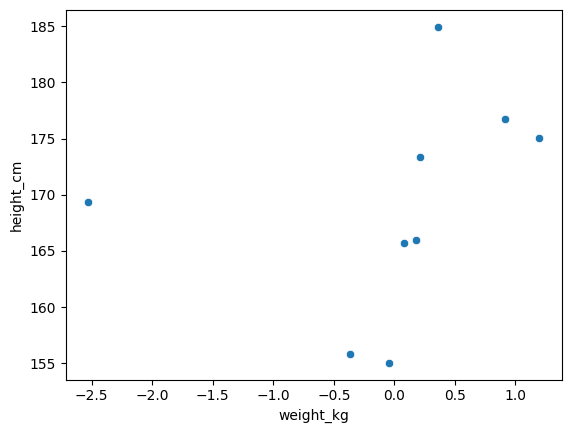

In [56]:
#only weight kg scatterplot 
sns.scatterplot(x='weight_kg', y='height_cm', data=df)

In [57]:
np.random.seed(0)
df = np.random.exponential(size = 150 , scale = 2)
df = pd.DataFrame(df, columns=['values'])

df

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097
...,...
145,2.434039
146,0.211225
147,5.038564
148,2.505215


<Axes: xlabel='values', ylabel='Count'>

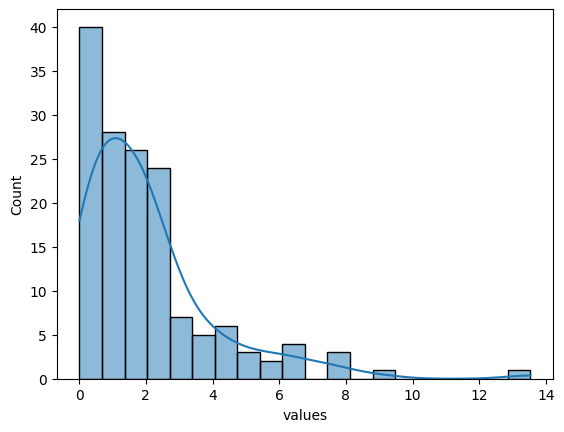

In [58]:
sns.histplot(df['values'], kde=True)

In [59]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer
pt_boxcox = PowerTransformer(method='box-cox' , standardize=False)
pt_yj = PowerTransformer(method = 'yeo-johnson', standardize=False)
pt = QuantileTransformer(output_distribution='normal')

df['BoxCox'] = pt_boxcox.fit_transform(df[['values']])
df['YeoJohnson'] = pt_yj.fit_transform(df[['values']])
df['Quantile'] = pt.fit_transform(df[['values']])

c:\Users\Md. Emon\.conda\envs\python_ml\Lib\site-packages\sklearn\preprocessing\_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (150). n_quantiles is set to n_samples.
  warnings.warn(


In [60]:
import matplotlib.pyplot as plt

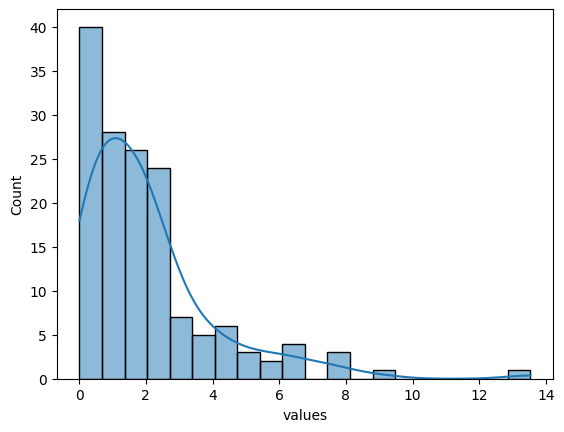

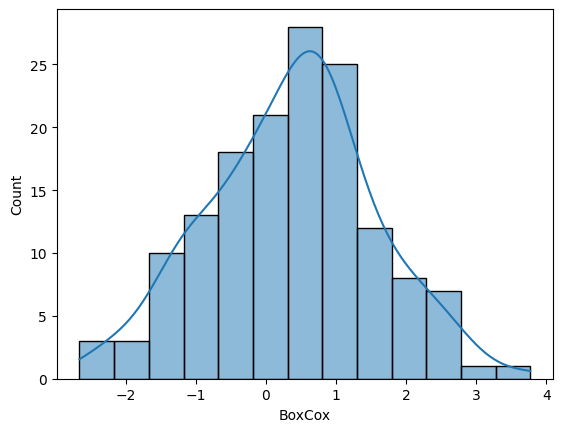

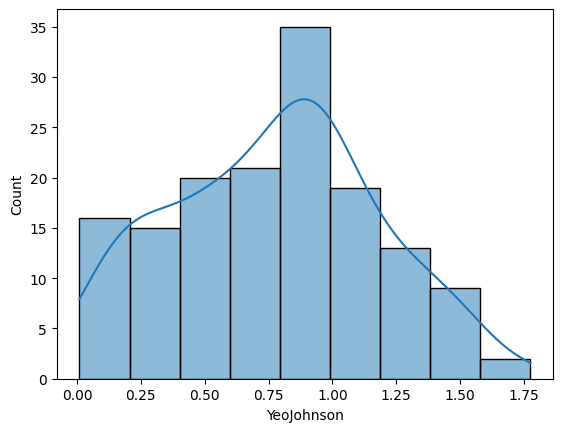

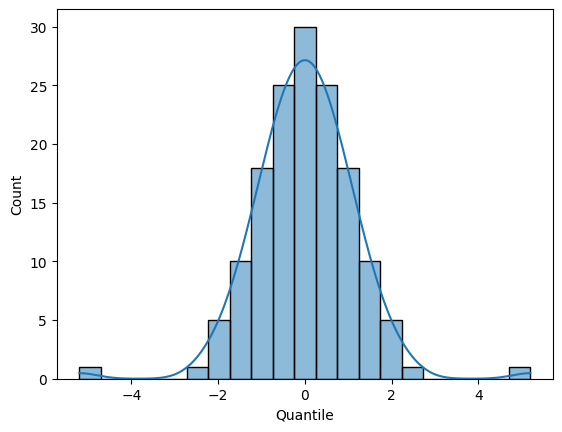

In [61]:
for col in df.columns:
    sns.histplot(df[col],kde=True)
    plt.show()

In [ ]:
    k

KeyError: 'status'